<a href="https://colab.research.google.com/github/donbcolab/composable_vlms/blob/main/notebooks/brain_tumor_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Landing AI - brain tumor detection

use detection and segmentation techniques to detect brain tumors



## Creating instructions

Load the image from the given file path '/home/user/tmpf4uerkjw.jpg' using the 'load_image' tool.
Use the 'grounding_sam' tool with the prompt 'brain tumor' to detect and segment the brain tumor in the loaded image. Set the box_threshold to 0.2 and iou_threshold to 0.2.
Overlay the segmentation masks on the original image using the 'overlay_segmentation_masks' tool.
Save the resulting image with the segmentation masks overlaid to a file using the 'save_image' tool.

## Retrieving tools

'load_image' is a utility function that loads an image from the given file path string.
'save_image' is a utility function that saves an image to a file path.
'grounding_sam' is a tool that can segment multiple objects given a text prompt such as category names or referring expressions. The categories in text prompt are separated by commas or periods. It returns a list of bounding boxes, label names, mask file names and associated probability scores.
'detr_segmentation' is a tool that can segment common objects in an image without any text prompt. It returns a list of detected objects as labels, their regions as masks and their scores.
'overlay_segmentation_masks' is a utility function that displays segmentation masks.
'overlay_heat_map' is a utility function that displays a heat map on an image.


In [1]:
!pip install -qU vision_agent

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.8/102.8 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.0/135.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.6/328.6 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.4/101.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import os
os.environ['XDG_RUNTIME_DIR'] = '/tmp/runtime-dir'

In [3]:
from typing import *
from pillow_heif import register_heif_opener
register_heif_opener()
import vision_agent as va
from vision_agent.tools import register_tool


from vision_agent.tools import load_image, grounding_sam, save_image, overlay_segmentation_masks

def detect_and_segment_brain_tumor(image_path: str, output_path: str, debug: bool = False) -> None:
    """
    Detect and segment the brain tumor in the given image and save the result.

    Parameters:
        image_path (str): The path to the input image.
        output_path (str): The path to save the output image.
        debug (bool): Flag to toggle logging on and off.
    """
    # Step 1: Load the image
    image = load_image(image_path)
    if debug:
        print("Image loaded successfully.")

    # Step 2: Detect and segment the brain tumor
    prompt = "brain tumor"
    segmentation_results = grounding_sam(prompt, image)
    if debug:
        print(f"Segmentation results: {segmentation_results}")

    # Step 3: Overlay the segmentation mask on the original image
    image_with_masks = overlay_segmentation_masks(image, segmentation_results)
    if debug:
        print("Segmentation masks overlaid on the image.")

    # Step 4: Save the resulting image
    save_image(image_with_masks, output_path)
    if debug:
        print(f"Image saved to {output_path}")

# Example usage (uncomment to run):
# detect_and_segment_brain_tumor("/home/user/tmpf4uerkjw.jpg", "/home/user/segmented_brain_tumor.jpg", debug=True)

In [6]:

from vision_agent.tools import load_image, grounding_sam, save_image, overlay_segmentation_masks

def test_detect_and_segment_brain_tumor():
    """
    Test case for the detect_and_segment_brain_tumor function.
    This test verifies the fundamental functionality under normal conditions.
    """
    # Define the input and output paths
    input_image_url = "https://huggingface.co/spaces/dwb2023/cellvisionai-agentic/resolve/main/examples/2921_jpg.rf.3b952f91f27a6248091e7601c22323ad.jpg"
    input_image_path = "/content/tmpf4uerkjw.jpg"
    output_image_path = "/content/segmented_brain_tumor.jpg"

    # doenload input_imagae_url to input_image_path location
    !wget -O $input_image_path $input_image_url

    # Call the function with debug mode enabled to print intermediate steps
    detect_and_segment_brain_tumor(input_image_path, output_image_path, debug=True)

    # Load the saved image to verify it was saved correctly
    saved_image = load_image(output_image_path)

    # Print the shape of the saved image to verify the output format
    print(f"Saved image shape: {saved_image.shape}")

    # Return the saved image for further inspection if needed
    return saved_image

--2024-07-18 22:33:41--  https://huggingface.co/spaces/dwb2023/cellvisionai-agentic/resolve/main/examples/2921_jpg.rf.3b952f91f27a6248091e7601c22323ad.jpg
Resolving huggingface.co (huggingface.co)... 3.163.189.90, 3.163.189.114, 3.163.189.74, ...
Connecting to huggingface.co (huggingface.co)|3.163.189.90|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43119 (42K) [image/jpeg]
Saving to: ‘/content/tmpf4uerkjw.jpg’

/content/tmpf4uerkj 100%[===================>]  42.11K  --.-KB/s    in 0.06s   

2024-07-18 22:33:41 (672 KB/s) - ‘/content/tmpf4uerkjw.jpg’ saved [43119/43119]

Image loaded successfully.
Segmentation results: [{'score': 0.39, 'label': 'brain tumor', 'bbox': [0.14, 0.15, 1.0, 0.88], 'mask': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}, {'score': 0.3, 'label': 'brain tumor', 'bbo

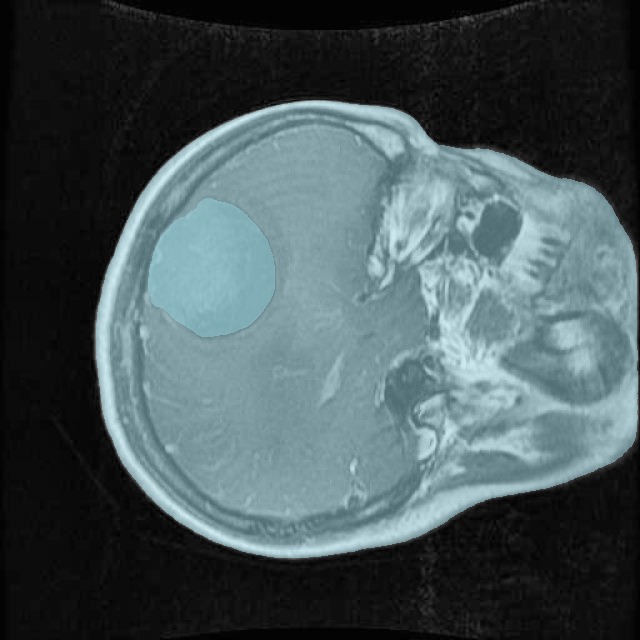

Image saved to /content/segmented_brain_tumor.jpg
Saved image shape: (640, 640, 3)


array([[[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       ...,

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]]], dtype=uint8)
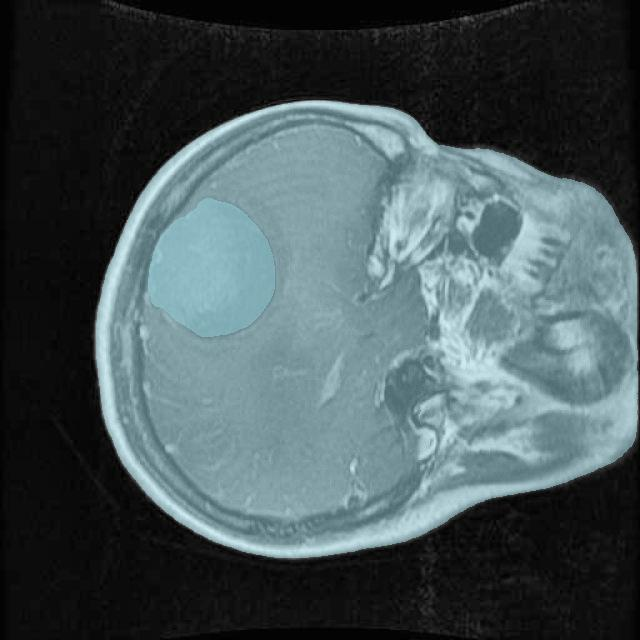

In [7]:
# Run the test case
test_detect_and_segment_brain_tumor()